### 1. Crear un entorno de anaconda con los paquetes que considere necesarios.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
d = np.load('proyecto_training_data.npy') 
df = pd.DataFrame(d)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación y pruebas(20 %).

In [2]:
Porcentaje = int(df[0].count()*.8)
Porcentaje

1168

In [3]:
Set_Entrenamiento = df.iloc[:Porcentaje]
Set_Entrenamiento.set_axis(['SalePrice', 'OverallQual', 'First Floor square feet','Total rooms above grade', 
                            'Original construction date', 'Linear feet of street connected to property'], 
                    axis='columns', inplace=True)
Set_Entrenamiento

,SalePrice,OverallQual,First Floor square feet,Total rooms above grade,Original construction date,Linear feet of street connected to property
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [4]:
Set_Pruebas = df.iloc[Porcentaje:]
Set_Pruebas.set_axis(['SalePrice', 'OverallQual', 'First Floor square feet','Total rooms above grade', 
                      'Original construction date', 'Linear feet of street connected to property'], axis='columns', inplace=True)
Set_Pruebas

,SalePrice,OverallQual,First Floor square feet,Total rooms above grade,Original construction date,Linear feet of street connected to property
1168,235000.0,6.0,1236.0,7.0,1935.0,120.0
1169,625000.0,10.0,1831.0,10.0,1995.0,118.0
1170,171000.0,6.0,1118.0,6.0,1977.0,76.0
1171,163000.0,6.0,1261.0,6.0,1958.0,76.0
1172,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):

   * Media
   * Valor máximo
   * Valor mínimo
   * Rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
   * Desviación estándar.


In [5]:
Media = Set_Entrenamiento.mean(axis=0)
Valor_Maximo =  Set_Entrenamiento.max(axis=0)
Valor_Minimo = Set_Entrenamiento.min(axis=0)
Desviacion_Estandar = Set_Entrenamiento.std(axis=0)
Rango = Set_Entrenamiento.ndim

Resultados = ({'Media':pd.Series(Media,dtype=float), 'Valor_Maximo':pd.Series(Valor_Maximo,dtype=float), 'Valor_Minimo':pd.Series(Valor_Minimo,dtype=float),
             'Desviacion_Estandar':pd.Series(Desviacion_Estandar,dtype=float), 'Rango':pd.Series(Rango)})
dfAnalisis = pd.DataFrame(Resultados)
dfAnalisis

,Media,Valor_Maximo,Valor_Minimo,Desviacion_Estandar,Rango
0,NaN,NaN,NaN,NaN,2.0
First Floor square feet,1156.323630,3228.0,334.0,373.780374,NaN
Linear feet of street connected to property,69.946985,313.0,21.0,23.478161,NaN
Original construction date,1971.451199,2010.0,1875.0,29.951707,NaN
OverallQual,6.101027,10.0,1.0,1.378025,NaN
SalePrice,180590.277397,755000.0,34900.0,78815.697902,NaN
Total rooms above grade,6.485445,14.0,2.0,1.609141,NaN


In [6]:
Set_Entrenamiento.describe()

,SalePrice,OverallQual,First Floor square feet,Total rooms above grade,Original construction date,Linear feet of street connected to property
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


### 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.

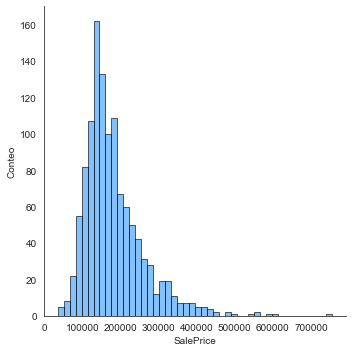

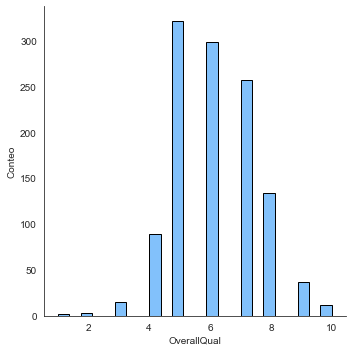

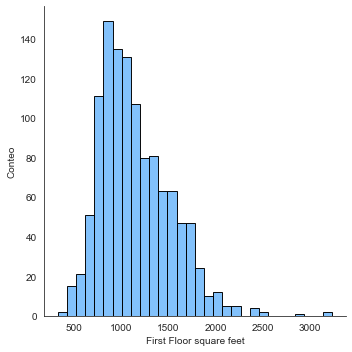

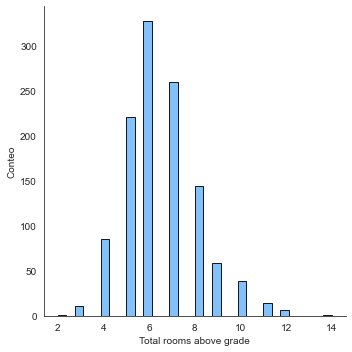

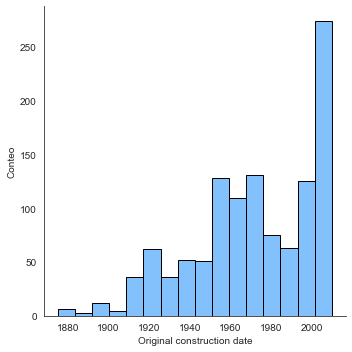

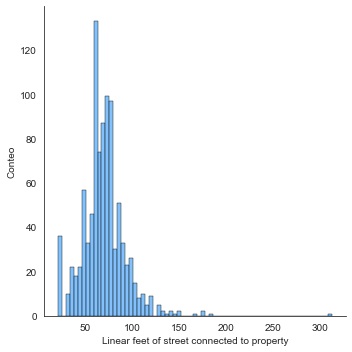

In [7]:
for i in Set_Entrenamiento.columns.values:
    ax = sns.displot(Set_Entrenamiento[i], edgecolor='k', color="#58ACFA")
    plt.xlabel(i)
    plt.ylabel('Conteo')
    plt.show()

### 5. Para cada variable independiente x :
   * Calcular el coeficiente de correlación entre x y y.
   * Graficar x vs y(scatterplot) usando matplotlib.
   * Colocar el coeficiente de correlación y colocarlo como parte del título  de la gráfica.
   * Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente.

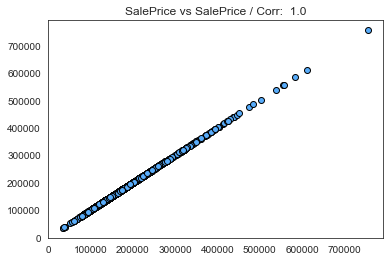

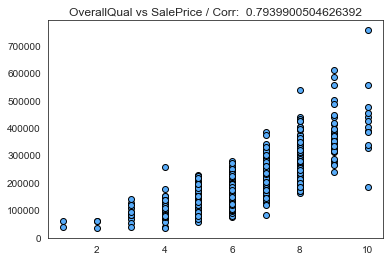

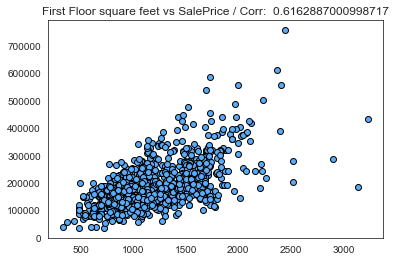

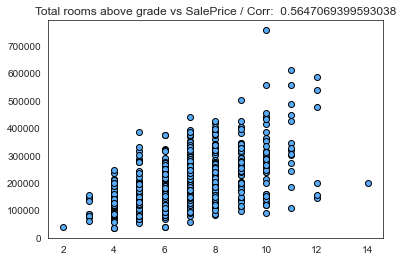

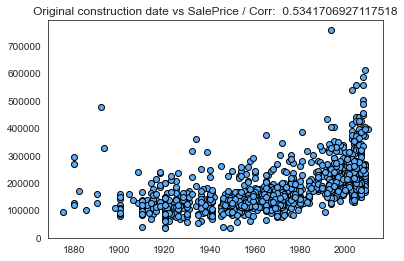

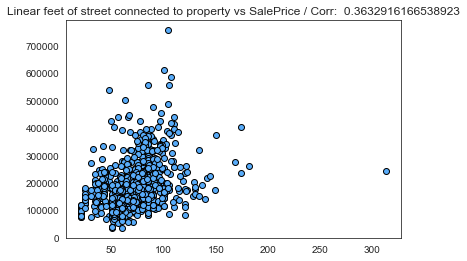

In [8]:
Correlaciones = []
for i in Set_Entrenamiento.columns.values:
    Correlacion = (pd.DataFrame(Set_Entrenamiento[[i,'SalePrice']]).corr().iloc[0,1])
    Correlaciones.append(Correlacion)
    plt.scatter(Set_Entrenamiento[i], Set_Entrenamiento['SalePrice'], edgecolor='k', color="#58ACFA")
    plt.title(str(i)+' vs ' + str('SalePrice') + ' / Corr:  '+str((Correlacion)))
    plt.show()

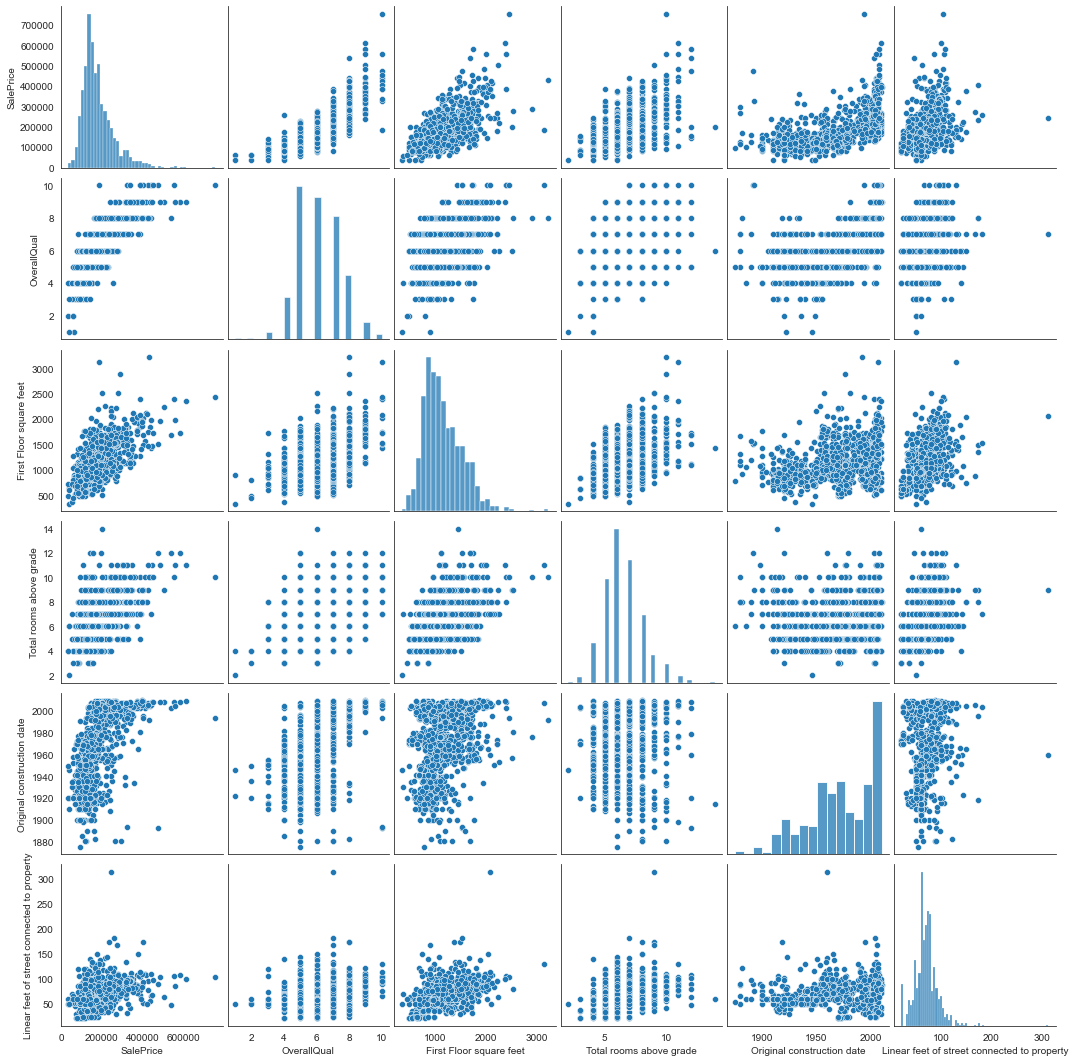

In [9]:
sns.pairplot(Set_Entrenamiento)

In [10]:
Mejor_Potencial = pd.DataFrame({'Correlaciones':Correlaciones},index=[Set_Entrenamiento.columns.values])
Mejor_Potencial

,Correlaciones
SalePrice,1.000000
OverallQual,0.793990
First Floor square feet,0.616289
Total rooms above grade,0.564707
Original construction date,0.534171
Linear feet of street connected to property,0.363292


In [11]:
print('Las 2 mejores variables de coeficiente de correlación son: ')
Mejor_Potencial['Correlaciones'].nlargest(3)[1:3]

Las 2 mejores variables de coeficiente de correlación son: 


OverallQual                0.793990
First Floor square feet    0.616289
Name: Correlaciones, dtype: float64

### 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 +β1 ∗x. La función recibe como argumentos:
    6.1 Vector con la variable independiente x,
    
    6.2 Vector con la variable dependiente y,
    
    6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
    
    6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos imprimir a través de print: el número de iteración, el error del modelo en esa iteración, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.
    
    6.5 escalar α(learning rate): es usado como parte de la expresión matemática para actualizar
    en cada iteración los parámetros del modelo

In [182]:
class My_regresion():
    #Constructor
    def __init__(self, x, y, epochs, imprimir_error_cada, learning_rate):
        self.x = x
        self.y = y
        self.b0 = 0
        self.b1 = 0
        self.epochs = epochs
        self.Error = []
        self.Modelo = {}  
        self.VectorY = np.reshape(self.y, (-1,1))
        self.VectorUnos = np.ones_like(self.x).reshape(-1,1)
        self.VectorXUnos = np.hstack([np.reshape(self.x,(-1,1)),self.VectorUnos])
        self.betas = np.reshape([[self.b1],[self.b0]],(-1,1))
      
        for i in range(epochs):
            self.y_hat = np.dot(self.VectorXUnos, self.betas)
            self.Errores = 1/(2*self.VectorY.shape[0]) * sum((self.VectorY - self.y_hat)**2)
            self.Error.append(self.Errores[0])
            if i%round(imprimir_error_cada) == 0:
                print('\nIteraciones: ', i, '    Error: ',self.Errores[0])
            self.gradiante = np.reshape(learning_rate*(1/self.VectorY.shape[0]*sum((self.y_hat - self.VectorY)*self.VectorXUnos)),(-1,1))
            self.betas = self.betas - self.gradiante
            self.Modelo[i] = [self.betas, self.y_hat, self.VectorY, self.x]
    
    #Modelo
    def modelo(self):
        return self.Modelo , np.array(self.Error)
    
    #Errores del Modelo
    @staticmethod
    def error(error):
        fig_1 = plt.figure(figsize = (9,7))
        ax = fig_1.add_axes([0.02, 0.02, 0.8, 0.8])
        ax.plot(error, color="#58ACFA")
        ax.set_title("Errores del modelo")
        ax.set_xlabel("Numero de Iteraciones")
        ax.set_ylabel('Error')
        plt.show()
    
    #Evolución del Modelo
    @staticmethod
    def evolucion(Modelo, n):
        for i in list(Modelo.keys()):
            if i%round(n) == 0:
                fig_2 = plt.figure(figsize = (9,7))
                ax_2 = fig_2.add_axes([0.02, 0.02, 0.8, 0.8])
                y_hat = Modelo[i][1]
                y = Modelo[i][2]
                x = Modelo[i][3]
                ax_2.scatter(x , y, edgecolor='k', color="#58ACFA")
                ax_2.plot(x, y_hat , linestyle ='solid', color ='r', label = 'Iteración:  %d' % i)
                ax_2.set_title("Iteración: "+str(i))
                ax_2.legend()
                ax_2.set_xlabel("X")
                ax_2.set_ylabel("Y")
                plt.show()
    
    #Método de Predicción 
    def prediccion(self, M):
        self.M = M
        self.VectorUnos = np.ones_like(self.M).reshape(-1,1)
        self.VectorXUnos = np.hstack([np.reshape(self.M,(-1,1)),self.VectorUnos])
        for i in range(self.epochs):
            self.Y_pred = np.dot(self.VectorXUnos, self.betas)
        return self.Y_pred
    
    #Compara Predicciones
    @staticmethod
    def compara_prediccion(Mpropio, Msklearn, Predecir, Modelo):
        MpropioResultado = Mpropio.prediccion(Predecir)
        MsklearnResultado = Msklearn.predict(Predecir.reshape(-1,1)) 
        Promedio = (MpropioResultado + MsklearnResultado)/2
        fig_3 = plt.figure(figsize = (9,7))
        ax_3 = fig_3.add_axes([0.02, 0.02, 0.8, 0.8])
        for i in list(Modelo.columns.values):
            y = Modelo[i]
            ax_3.scatter(Predecir , y, edgecolor='k', color="#58ACFA")
            ax_3.plot(Predecir, MpropioResultado, color="#58ACFA", label = 'My_regresion: ')
            ax_3.plot(Predecir, MsklearnResultado, color="r", label = 'Msklearn: ')
            ax_3.plot(Predecir, Promedio, color="b", label = 'Promedio: ')
            ax_3.set_title("Comparativa")
            ax_3.legend()
            ax_3.set_xlabel("X")
            ax_3.set_ylabel('Y')
            plt.show()
        return MpropioResultado, MsklearnResultado, Promedio
                


Iteraciones:  0     Error:  19409722053.221745

Iteraciones:  1000     Error:  1243042203.6766455

Iteraciones:  2000     Error:  1184197385.7979736

Iteraciones:  3000     Error:  1161375216.9390624

Iteraciones:  4000     Error:  1152523946.5944335

Iteraciones:  5000     Error:  1149091100.7856905


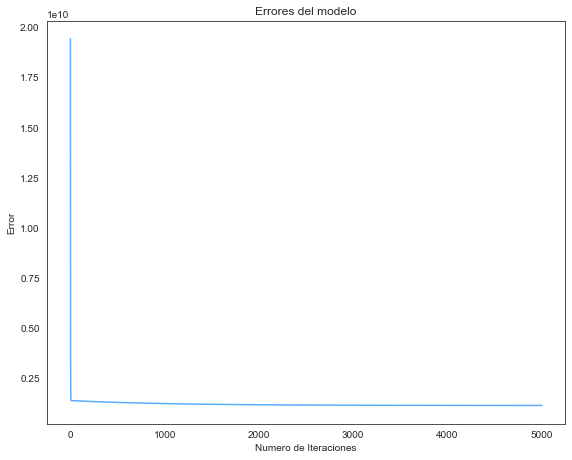

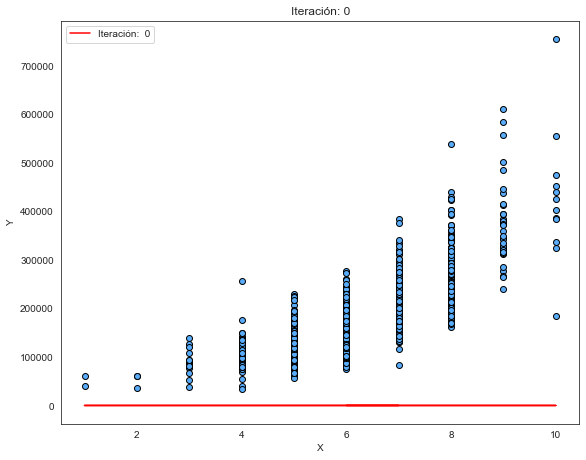

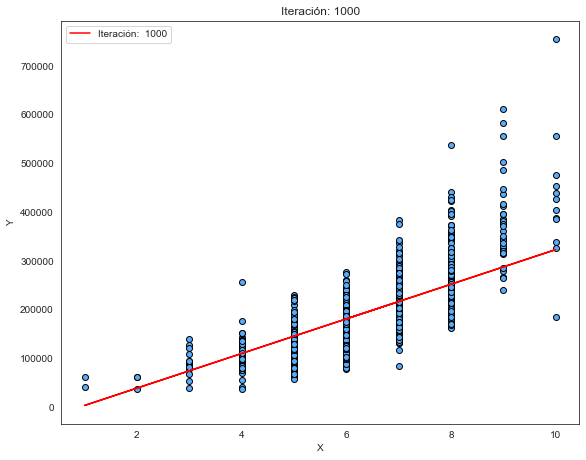

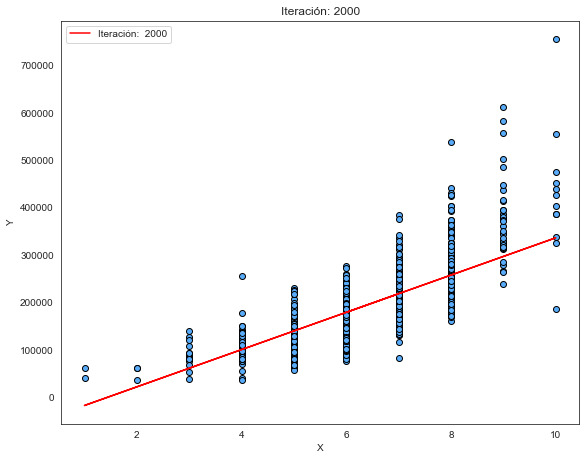

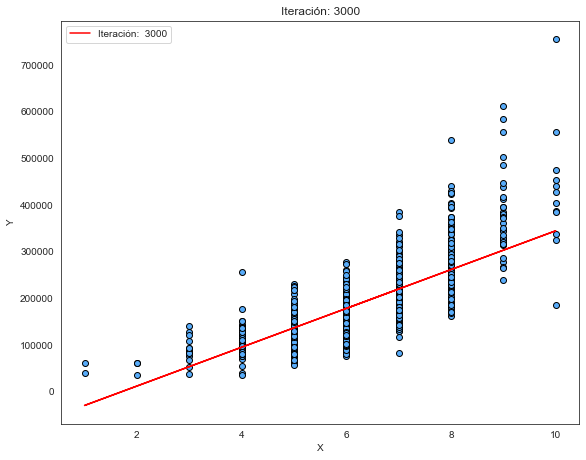

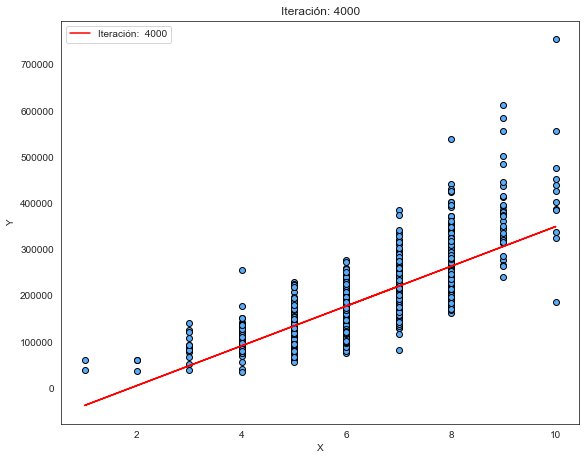

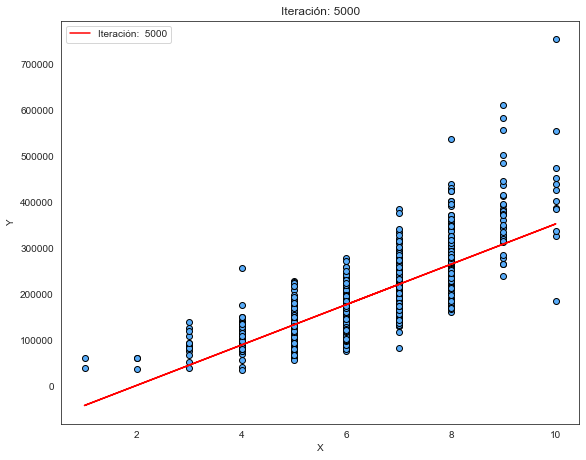

In [183]:
NPSales = np.reshape(np.array(Set_Entrenamiento['SalePrice']), (-1, 1))
NPOverallQual = np.reshape(np.array(Set_Entrenamiento['OverallQual']), (-1, 1))
NPFirst_Floor_square_feet = np.reshape(np.array(Set_Entrenamiento['First Floor square feet']), (-1, 1))
Epoch = 5001
Imprimir = 1000
Escalar = 0.01
RegresionModelo1 = My_regresion(NPOverallQual, NPSales, Epoch, Imprimir, Escalar)
Rmodelos, Rerrores = RegresionModelo1.modelo()
My_regresion.error(Rerrores)
My_regresion.evolucion(Rmodelos,Imprimir)


Iteraciones:  0     Error:  19409722053.221745

Iteraciones:  10     Error:  2682203837.751272

Iteraciones:  20     Error:  1997330831.0274537

Iteraciones:  30     Error:  1969290140.4881198

Iteraciones:  40     Error:  1968142065.5973017

Iteraciones:  50     Error:  1968095052.2081733


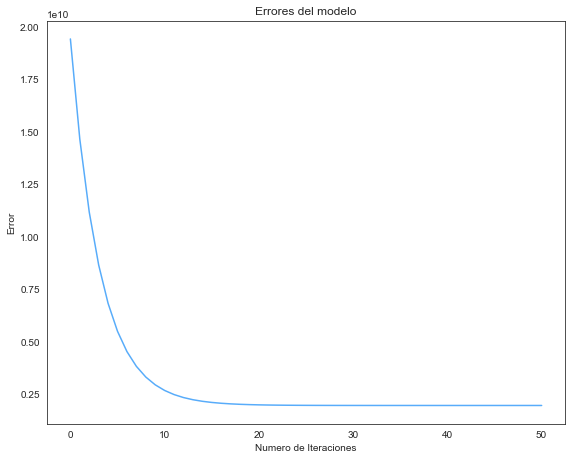

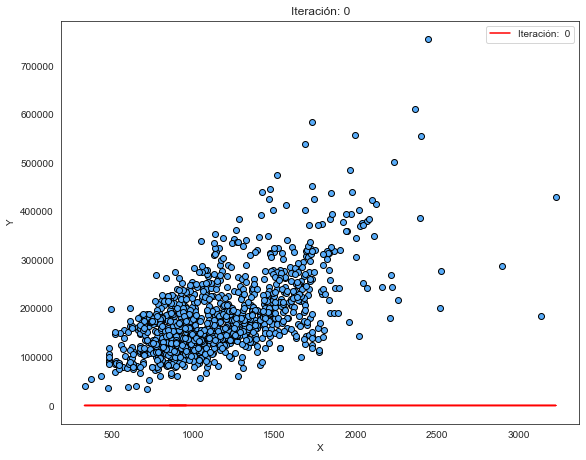

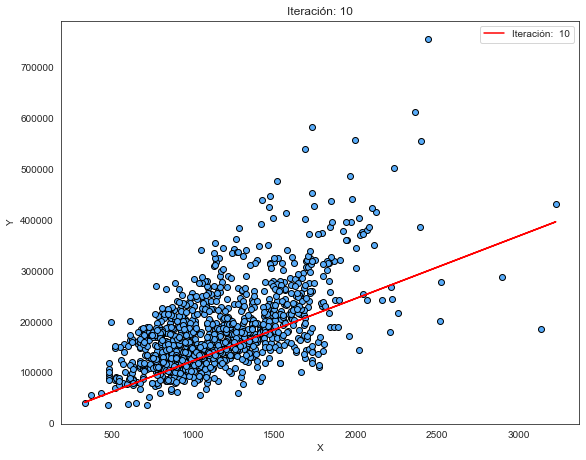

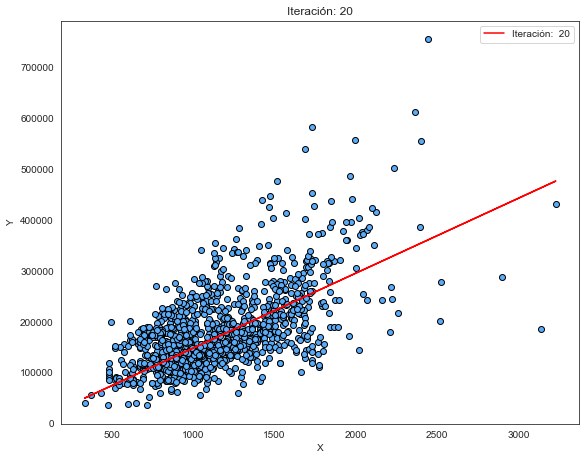

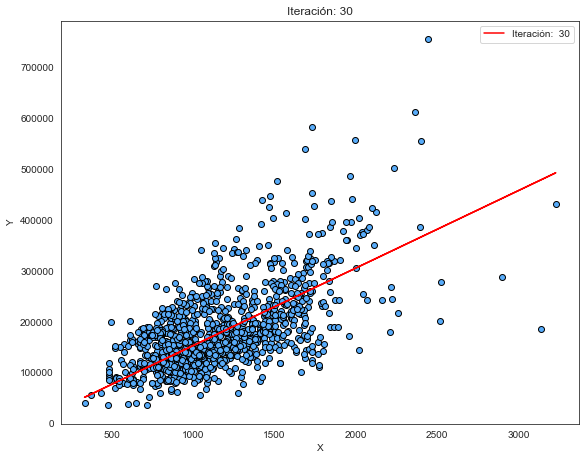

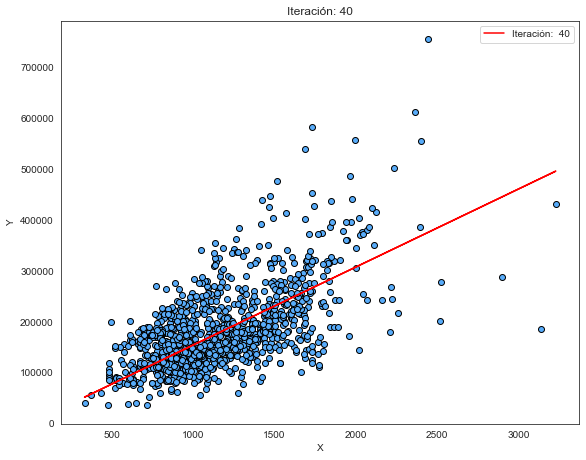

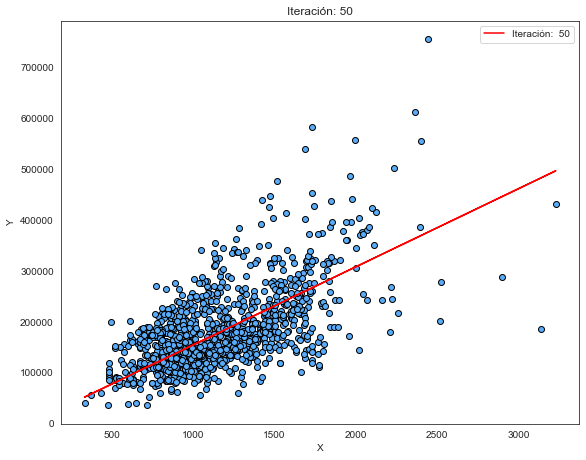

In [184]:
Epoch = 51
Imprimir = 10
Escalar = 0.0000001
RegresionModelo2 = My_regresion(NPFirst_Floor_square_feet, NPSales, Epoch, Imprimir, Escalar)
Rmodelos2, Rerrores2 = RegresionModelo2.modelo()
My_regresion.error(Rerrores2)
My_regresion.evolucion(Rmodelos2,Imprimir)

In [185]:
Sci_NPOverallQual = LinearRegression()
Sci_NPOverallQual.fit(NPOverallQual, NPSales)
Sci_NPFirst_Floor_square_feet = LinearRegression()
Sci_NPFirst_Floor_square_feet.fit(NPFirst_Floor_square_feet, NPSales)

LinearRegression()

In [186]:
Pruebas_OverallQual = np.reshape(np.array(Set_Pruebas['OverallQual']), (-1, 1))
Pruebas_Floor_square_feet = np.reshape(np.array(Set_Pruebas['First Floor square feet']), (-1, 1))

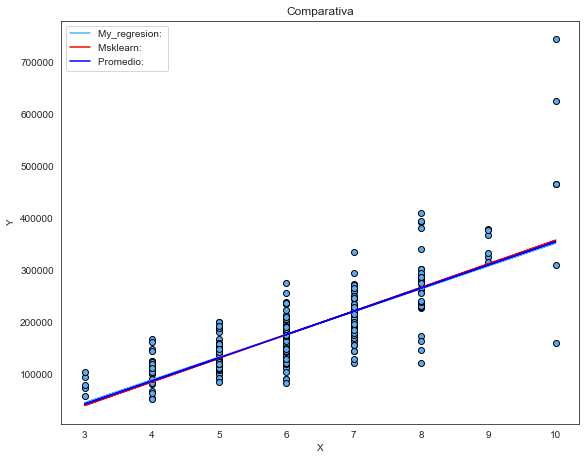

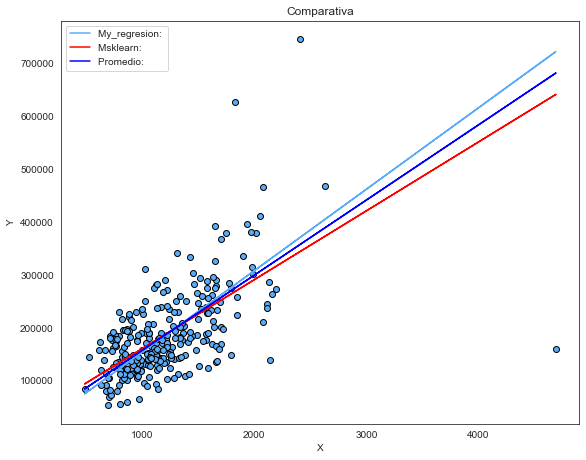

In [187]:
modelos_OverallQual = My_regresion.compara_prediccion(RegresionModelo1, Sci_NPOverallQual, Pruebas_OverallQual, Set_Pruebas)
modelos_1stFlrSF = My_regresion.compara_prediccion(RegresionModelo2, Sci_NPFirst_Floor_square_feet, Pruebas_Floor_square_feet, Set_Pruebas)